In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\sponer bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_sponer.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.5,-12.3,-11.8,-12.3,-11.8,-12.0,-12.0,-11.4,-9.5,-11.5,...,-11.4,-9.5,-13.1,-11.8,-12.0,-11.2,-11.5,-9.5,-11.4,1
1,-11.5,-11.4,-9.5,-12.3,-12.0,-12.0,-10.6,-11.4,-12.3,-12.0,...,-11.5,-11.4,-12.0,-11.8,-12.3,-11.8,-12.3,-12.0,-10.6,1
2,-11.2,-10.6,-12.0,-12.3,-11.8,-12.3,-11.4,-12.0,-12.0,-11.5,...,-13.1,-9.5,-11.4,-10.6,-12.3,-11.8,-12.0,-12.0,-12.3,1
3,-11.5,-13.2,-13.1,-9.5,-11.4,-12.0,-10.6,-12.0,-12.0,-11.2,...,-11.4,-12.3,-10.6,-12.3,-9.5,-11.4,-11.5,-13.2,-9.5,1
4,-11.2,-12.0,-10.6,-12.0,-11.4,-11.5,-12.0,-11.2,-11.8,-12.3,...,-13.1,-11.4,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-12.0,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-11.5,-11.8,-11.2,-10.6,-11.4,-12.3,-10.6,-12.0,-12.0,-11.2,...,-11.5,-13.2,-9.5,-13.1,-9.5,-9.5,-11.4,-12.0,-11.5,-11.8
1,-9.5,-11.4,-11.5,-11.4,-12.0,-11.5,-9.5,-11.4,-12.0,-11.8,...,-12.3,-13.2,-9.5,-13.1,-13.2,-12.3,-10.6,-11.2,-11.8,-13.1
2,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,-11.8,-12.3,-12.0,-11.8,...,-12.0,-12.0,-11.8,-12.3,-11.5,-13.2,-11.5,-12.0,-12.3,-11.4
3,-11.8,-12.3,-11.4,-12.0,-10.6,-12.0,-12.0,-12.3,-11.8,-12.0,...,-13.1,-13.2,-11.5,-12.3,-13.2,-11.5,-12.0,-12.0,-11.2,-12.0
4,-12.0,-12.0,-11.5,-11.4,-11.8,-13.1,-13.2,-11.5,-11.4,-11.5,...,-11.5,-11.4,-11.5,-12.3,-11.4,-10.6,-12.3,-11.4,-10.6,-11.2


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-11.5,-11.8,-11.2,-10.6,-11.4,-12.3,-10.6,-12.0,-12.0,-11.2,...,-11.5,-13.2,-9.5,-13.1,-9.5,-9.5,-11.4,-12.0,-11.5,-11.8
1,-9.5,-11.4,-11.5,-11.4,-12.0,-11.5,-9.5,-11.4,-12.0,-11.8,...,-12.3,-13.2,-9.5,-13.1,-13.2,-12.3,-10.6,-11.2,-11.8,-13.1
2,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,-11.8,-12.3,-12.0,-11.8,...,-12.0,-12.0,-11.8,-12.3,-11.5,-13.2,-11.5,-12.0,-12.3,-11.4
3,-11.8,-12.3,-11.4,-12.0,-10.6,-12.0,-12.0,-12.3,-11.8,-12.0,...,-13.1,-13.2,-11.5,-12.3,-13.2,-11.5,-12.0,-12.0,-11.2,-12.0
4,-12.0,-12.0,-11.5,-11.4,-11.8,-13.1,-13.2,-11.5,-11.4,-11.5,...,-11.5,-11.4,-11.5,-12.3,-11.4,-10.6,-12.3,-11.4,-10.6,-11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-10.6,-12.0,-12.3,-13.2,-11.5,-12.3,-9.5,-11.8,-12.0,-12.3,...,-11.5,-11.4,-11.5,-11.8,-12.0,-12.3,-13.2,-9.5,-9.5,-12.3
14665,-11.4,-12.0,-11.5,-11.8,-11.4,-12.3,-11.8,-9.5,-12.3,-11.5,...,-10.6,-12.0,-11.2,-11.8,-11.5,-11.4,-9.5,-11.5,-11.2,-11.8
14666,-12.0,-12.0,-12.0,-12.0,-12.3,-9.5,-13.2,-13.1,-11.8,-11.2,...,-12.0,-11.2,-11.5,-11.4,-11.8,-12.3,-11.5,-11.8,-12.0,-12.3
14667,-13.1,-11.4,-12.0,-10.6,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,...,-11.2,-10.6,-12.0,-12.0,-12.0,-12.0,-11.2,-11.8,-12.3,-11.8


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.5,-11.8,-11.2,-10.6,-11.4,-12.3,-10.6,-12.0,-12.0,-11.2,...,-13.2,-9.5,-13.1,-9.5,-9.5,-11.4,-12.0,-11.5,-11.8,0
1,-9.5,-11.4,-11.5,-11.4,-12.0,-11.5,-9.5,-11.4,-12.0,-11.8,...,-13.2,-9.5,-13.1,-13.2,-12.3,-10.6,-11.2,-11.8,-13.1,0
2,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,-11.8,-12.3,-12.0,-11.8,...,-12.0,-11.8,-12.3,-11.5,-13.2,-11.5,-12.0,-12.3,-11.4,0
3,-11.8,-12.3,-11.4,-12.0,-10.6,-12.0,-12.0,-12.3,-11.8,-12.0,...,-13.2,-11.5,-12.3,-13.2,-11.5,-12.0,-12.0,-11.2,-12.0,0
4,-12.0,-12.0,-11.5,-11.4,-11.8,-13.1,-13.2,-11.5,-11.4,-11.5,...,-11.4,-11.5,-12.3,-11.4,-10.6,-12.3,-11.4,-10.6,-11.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-10.6,-12.0,-12.3,-13.2,-11.5,-12.3,-9.5,-11.8,-12.0,-12.3,...,-11.4,-11.5,-11.8,-12.0,-12.3,-13.2,-9.5,-9.5,-12.3,0
14665,-11.4,-12.0,-11.5,-11.8,-11.4,-12.3,-11.8,-9.5,-12.3,-11.5,...,-12.0,-11.2,-11.8,-11.5,-11.4,-9.5,-11.5,-11.2,-11.8,0
14666,-12.0,-12.0,-12.0,-12.0,-12.3,-9.5,-13.2,-13.1,-11.8,-11.2,...,-11.2,-11.5,-11.4,-11.8,-12.3,-11.5,-11.8,-12.0,-12.3,0
14667,-13.1,-11.4,-12.0,-10.6,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,...,-10.6,-12.0,-12.0,-12.0,-12.0,-11.2,-11.8,-12.3,-11.8,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-11.575595
1,-79,-11.580183
2,-78,-11.595528
3,-77,-11.576174
4,-76,-11.584212
...,...,...
94,14,-11.557407
95,15,-11.563835
96,16,-11.568669
97,17,-11.542055


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-11.593490,150
1,-79,-11.604745,151
2,-78,-11.596176,152
3,-77,-11.602072,153
4,-76,-11.608037,154
...,...,...,...
94,14,-11.606265,244
95,15,-11.606619,245
96,16,-11.612973,246
97,17,-11.613573,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


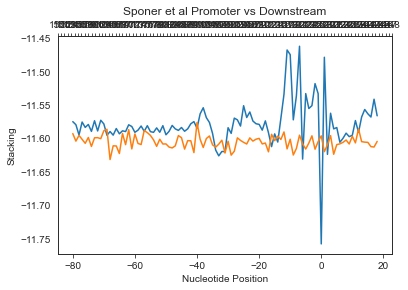

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Sponer et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.5,-12.3,-11.8,-12.3,-11.8,-12.0,-12.0,-11.4,-9.5,-11.5,...,-11.4,-9.5,-13.1,-11.8,-12.0,-11.2,-11.5,-9.5,-11.4,1
1,-11.5,-11.4,-9.5,-12.3,-12.0,-12.0,-10.6,-11.4,-12.3,-12.0,...,-11.5,-11.4,-12.0,-11.8,-12.3,-11.8,-12.3,-12.0,-10.6,1
2,-11.2,-10.6,-12.0,-12.3,-11.8,-12.3,-11.4,-12.0,-12.0,-11.5,...,-13.1,-9.5,-11.4,-10.6,-12.3,-11.8,-12.0,-12.0,-12.3,1
3,-11.5,-13.2,-13.1,-9.5,-11.4,-12.0,-10.6,-12.0,-12.0,-11.2,...,-11.4,-12.3,-10.6,-12.3,-9.5,-11.4,-11.5,-13.2,-9.5,1
4,-11.2,-12.0,-10.6,-12.0,-11.4,-11.5,-12.0,-11.2,-11.8,-12.3,...,-13.1,-11.4,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-10.6,-12.0,-12.3,-13.2,-11.5,-12.3,-9.5,-11.8,-12.0,-12.3,...,-11.4,-11.5,-11.8,-12.0,-12.3,-13.2,-9.5,-9.5,-12.3,0
29334,-11.4,-12.0,-11.5,-11.8,-11.4,-12.3,-11.8,-9.5,-12.3,-11.5,...,-12.0,-11.2,-11.8,-11.5,-11.4,-9.5,-11.5,-11.2,-11.8,0
29335,-12.0,-12.0,-12.0,-12.0,-12.3,-9.5,-13.2,-13.1,-11.8,-11.2,...,-11.2,-11.5,-11.4,-11.8,-12.3,-11.5,-11.8,-12.0,-12.3,0
29336,-13.1,-11.4,-12.0,-10.6,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,...,-10.6,-12.0,-12.0,-12.0,-12.0,-11.2,-11.8,-12.3,-11.8,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
X.shape

(29338, 99)

## Model Training

In [28]:
kfold = KFold(n_splits=10, shuffle=True)
clf = XGBClassifier(colsample_bytree=0.5, gamma=0, learning_rate=0.1, 
                    max_depth=None, min_child_weight=5, n_estimators=300, 
                    subsample=1.0, n_jobs=-1, random_state=101)
fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.8561690524880708, Precision: 0.8799142244460328, Recall: 0.828956228956229, F1 Score: 0.8536754507628295, MCC: 0.7137276988646272, Specificity: 0.8840579710144928
Fold 2: Accuracy: 0.8670756646216768, Precision: 0.8785046728971962, Recall: 0.8468468468468469, F1 Score: 0.8623853211009174, MCC: 0.7343881092956522, Specificity: 0.886653252850436
Fold 3: Accuracy: 0.8742331288343558, Precision: 0.8914285714285715, Recall: 0.851877133105802, F1 Score: 0.8712041884816755, MCC: 0.7491864526030912, Specificity: 0.8965282505105514
Fold 4: Accuracy: 0.8660531697341514, Precision: 0.879347054648687, Recall: 0.847469220246238, F1 Score: 0.8631138975966562, MCC: 0.7325485973601095, Specificity: 0.8845108695652174
Fold 5: Accuracy: 0.8677573278800272, Precision: 0.8901408450704226, Recall: 0.8449197860962567, F1 Score: 0.8669410150891633, MCC: 0.7366700456863519, Specificity: 0.8915159944367177
Fold 6: Accuracy: 0.8824130879345603, Precision: 0.8951149425287356, Recall: 0.862283

In [29]:
accuracy_list

[0.8561690524880708,
 0.8670756646216768,
 0.8742331288343558,
 0.8660531697341514,
 0.8677573278800272,
 0.8824130879345603,
 0.869120654396728,
 0.867416496250852,
 0.8738493010569383,
 0.8779406750767133]

In [30]:
precision_list

[0.8799142244460328,
 0.8785046728971962,
 0.8914285714285715,
 0.879347054648687,
 0.8901408450704226,
 0.8951149425287356,
 0.8924501424501424,
 0.8791755508173419,
 0.8917378917378918,
 0.8959081119885139]

In [31]:
recall_list

[0.828956228956229,
 0.8468468468468469,
 0.851877133105802,
 0.847469220246238,
 0.8449197860962567,
 0.8622837370242215,
 0.8432032301480484,
 0.8495879120879121,
 0.8517006802721089,
 0.8542094455852156]

In [32]:
specificity_list

[0.8840579710144928,
 0.886653252850436,
 0.8965282505105514,
 0.8845108695652174,
 0.8915159944367177,
 0.9019476158495635,
 0.8957182320441989,
 0.8849797023004059,
 0.8961038961038961,
 0.9014945652173914]

In [33]:
f1_score_list 

[0.8536754507628295,
 0.8623853211009174,
 0.8712041884816755,
 0.8631138975966562,
 0.8669410150891633,
 0.8783926683115968,
 0.8671280276816609,
 0.8641285365001746,
 0.8712595685455812,
 0.874562018220042]

In [34]:
mcc_list

[0.7137276988646272,
 0.7343881092956522,
 0.7491864526030912,
 0.7325485973601095,
 0.7366700456863519,
 0.7651460115079899,
 0.7395417511202032,
 0.7351621082457885,
 0.7484825029613957,
 0.7566496256143184]

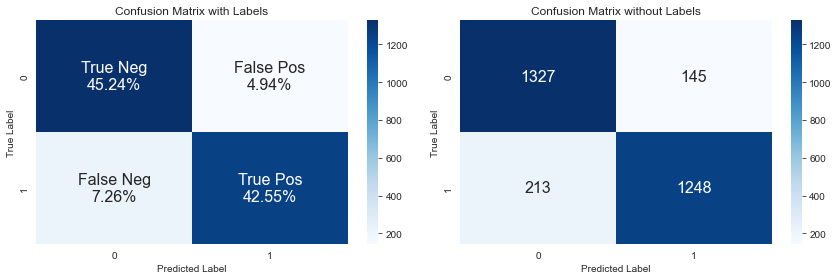

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_cm = confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [46]:
import pickle

# Save the trained model to a file in pickle format
model_filename = 'JSD_model.pickle'
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

print("Model saved successfully.")


Model saved successfully.


In [36]:
print(mean(accuracy_list))

0.8702028558274074


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


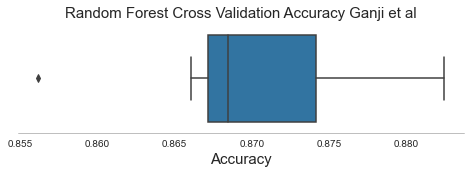

In [37]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [38]:
clf.feature_importances_

array([0.00551916, 0.00570091, 0.00571439, 0.00592003, 0.00566979,
       0.00572347, 0.00566769, 0.00626889, 0.00622825, 0.00543073,
       0.00542948, 0.00589468, 0.00581902, 0.00567492, 0.0058941 ,
       0.00582268, 0.00570202, 0.00613829, 0.00613111, 0.00601013,
       0.0059985 , 0.00567197, 0.0060499 , 0.00608329, 0.00616597,
       0.00588715, 0.0055974 , 0.0057067 , 0.00595597, 0.00559306,
       0.00618191, 0.00594139, 0.005688  , 0.00603771, 0.00628847,
       0.00569225, 0.0060908 , 0.00530657, 0.00564349, 0.0060646 ,
       0.00619159, 0.00622416, 0.00627273, 0.00552836, 0.00551506,
       0.00704563, 0.00896677, 0.00702488, 0.00639681, 0.00666324,
       0.00586801, 0.00576629, 0.00614847, 0.00618596, 0.00654035,
       0.00734822, 0.00788918, 0.00762888, 0.00769566, 0.00725065,
       0.00766126, 0.00688515, 0.00619162, 0.00753681, 0.0059857 ,
       0.00747009, 0.00822258, 0.01498179, 0.04893945, 0.11513817,
       0.03730461, 0.01288478, 0.02946407, 0.0421193 , 0.01946

In [39]:
clf.feature_importances_.shape

(99,)

In [40]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

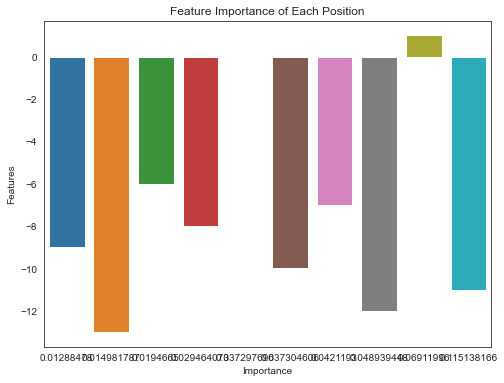

In [41]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [42]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.005519,-80
1,1,0.005701,-79
2,2,0.005714,-78
3,3,0.005920,-77
4,4,0.005670,-76
...,...,...,...
94,94,0.005971,14
95,95,0.005788,15
96,96,0.006373,16
97,97,0.006229,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

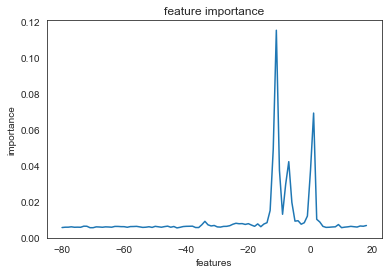

In [43]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [44]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8779406750767133
Precision: 0.8959081119885139
Recall: 0.8542094455852156
f1_score: 0.874562018220042


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


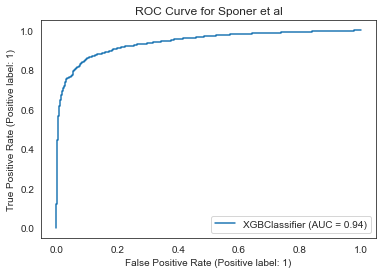

In [45]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Sponer et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


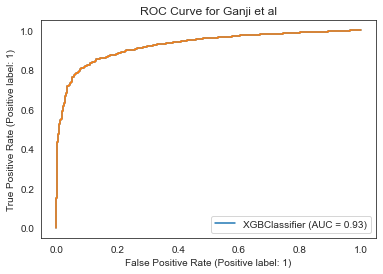

In [46]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

#roc_df.to_csv('d:/ROC Curve data/downstream_sponer_xg_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [46]:
!pip install shap

In [47]:
import shap


In [48]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [49]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[103, 1183, 2532, 1156, 5315, 7097, 6376, 3143, 4033, 6844, 5013, 8349, 9221, 3362, 2666, 8223, 191, 2700, 997, 7735, 5613, 965, 3990, 2002, 9253, 514, 6222, 1046, 9662, 8431, 6864, 3652, 1196, 4857, 9853, 5800, 8089, 5004, 824, 6813]


In [50]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [51]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-10.6,-11.4,-9.5,-12.3,-11.8,-12.3,-11.5,-13.2,-11.5,-11.4,...,-13.2,-13.1,-13.2,-9.5,-13.1,-9.5,-11.4,-11.8,-13.1,-13.2
6345,-11.8,-12.3,-11.8,-12.3,-9.5,-13.2,-13.1,-11.4,-10.6,-11.4,...,-12.3,-12.0,-11.5,-11.4,-11.5,-11.8,-12.3,-9.5,-11.4,-11.5
8807,-12.3,-9.5,-13.2,-13.1,-13.2,-11.5,-12.3,-9.5,-11.4,-11.5,...,-12.0,-12.3,-9.5,-13.2,-13.1,-11.4,-10.6,-12.0,-12.0,-11.4
5017,-11.8,-12.3,-10.6,-12.3,-11.8,-12.0,-12.0,-12.3,-11.8,-11.2,...,-11.8,-9.5,-13.1,-11.4,-11.8,-9.5,-13.1,-11.8,-12.0,-11.4
2395,-12.3,-11.5,-11.4,-11.5,-11.8,-11.4,-12.3,-11.5,-9.5,-9.5,...,-10.6,-12.0,-11.2,-10.6,-12.0,-11.4,-11.5,-12.0,-12.0,-12.0
4771,-11.5,-11.8,-12.3,-11.4,-11.8,-11.5,-12.0,-12.3,-9.5,-13.2,...,-11.4,-9.5,-9.5,-12.3,-11.8,-13.1,-11.4,-10.6,-12.3,-13.2
6378,-11.4,-11.5,-9.5,-13.2,-12.3,-11.8,-12.3,-12.0,-10.6,-11.2,...,-9.5,-13.2,-12.3,-12.0,-11.8,-11.5,-11.2,-12.0,-10.6,-12.3
6038,-11.5,-11.2,-10.6,-11.4,-11.5,-11.2,-11.8,-11.5,-11.2,-10.6,...,-11.2,-10.6,-12.0,-11.4,-11.5,-11.4,-13.1,-11.4,-10.6,-11.2
2073,-13.1,-11.8,-11.2,-11.5,-13.2,-12.3,-11.5,-13.2,-12.3,-11.8,...,-10.6,-11.4,-12.3,-12.0,-10.6,-12.0,-12.0,-11.2,-10.6,-11.4
8765,-12.3,-12.0,-10.6,-11.2,-11.8,-9.5,-12.3,-10.6,-11.4,-9.5,...,-10.6,-12.3,-13.2,-9.5,-11.5,-12.0,-11.4,-11.5,-11.2,-10.6


# Xpromoters

In [52]:
X_promoters= promoter.drop(columns=['label']) #X.loc[:14668]
X_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
0,-11.5,-12.3,-11.8,-12.3,-11.8,-12.0,-12.0,-11.4,-9.5,-11.5,...,-10.6,-11.4,-9.5,-13.1,-11.8,-12.0,-11.2,-11.5,-9.5,-11.4
1,-11.5,-11.4,-9.5,-12.3,-12.0,-12.0,-10.6,-11.4,-12.3,-12.0,...,-11.4,-11.5,-11.4,-12.0,-11.8,-12.3,-11.8,-12.3,-12.0,-10.6
2,-11.2,-10.6,-12.0,-12.3,-11.8,-12.3,-11.4,-12.0,-12.0,-11.5,...,-11.8,-13.1,-9.5,-11.4,-10.6,-12.3,-11.8,-12.0,-12.0,-12.3
3,-11.5,-13.2,-13.1,-9.5,-11.4,-12.0,-10.6,-12.0,-12.0,-11.2,...,-12.0,-11.4,-12.3,-10.6,-12.3,-9.5,-11.4,-11.5,-13.2,-9.5
4,-11.2,-12.0,-10.6,-12.0,-11.4,-11.5,-12.0,-11.2,-11.8,-12.3,...,-11.8,-13.1,-11.4,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-12.3,-9.5,-9.5,-11.4,-10.6,-12.0,-12.0,-12.0,-12.3,-13.2,...,-12.3,-13.2,-12.3,-10.6,-12.0,-12.0,-12.3,-11.8,-11.4,-12.3
14665,-11.5,-9.5,-11.8,-11.4,-12.3,-12.0,-12.0,-12.0,-11.8,-12.3,...,-13.2,-11.5,-11.2,-10.6,-12.3,-13.2,-11.5,-12.0,-11.2,-11.5
14666,-9.5,-11.4,-10.6,-11.2,-12.0,-12.0,-12.0,-12.0,-12.0,-12.0,...,-12.0,-12.0,-12.0,-11.2,-10.6,-12.3,-9.5,-13.2,-12.3,-12.0
14667,-13.2,-12.3,-11.5,-11.4,-11.5,-11.8,-12.0,-11.4,-12.3,-11.8,...,-12.3,-12.0,-10.6,-11.2,-12.0,-10.6,-11.2,-12.0,-10.6,-12.0


In [53]:
explainer = shap.TreeExplainer(clf, X_promoters)
shap_values = explainer.shap_values(X_promoters)

100%|===================| 14619/14669 [03:38<00:00]        

In [54]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

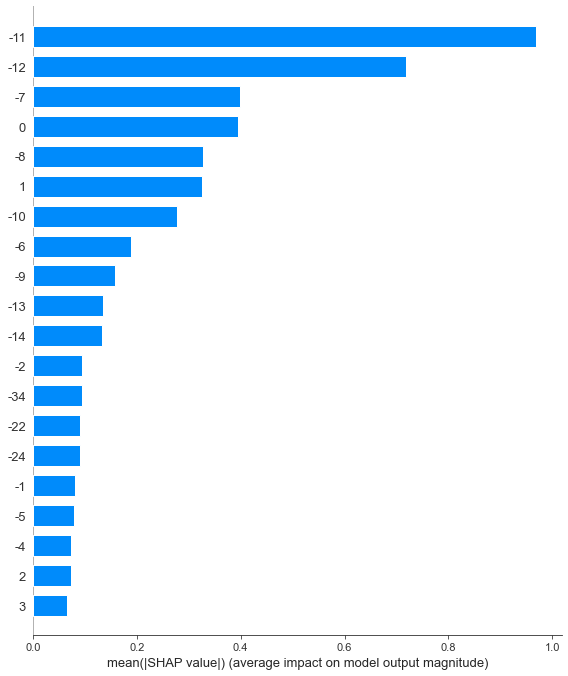

In [55]:
shap.summary_plot(shap_values,X_promoters, plot_type="bar", feature_names = X_promoters.columns)

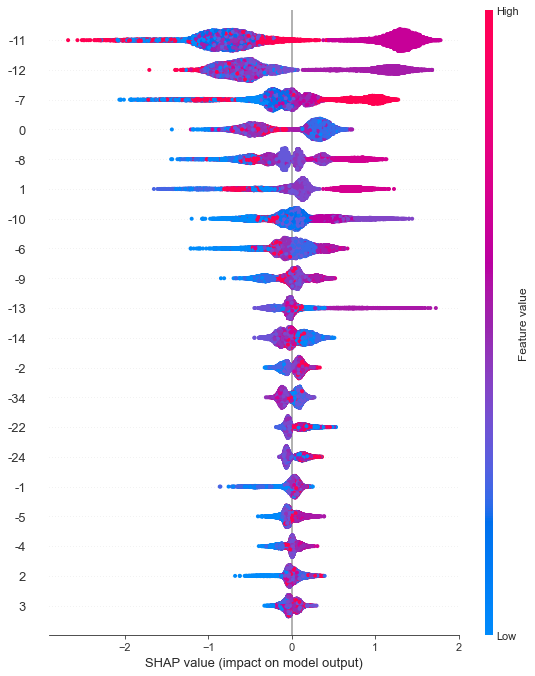

In [56]:
shap.summary_plot(shap_values, X_promoters, feature_names = X_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

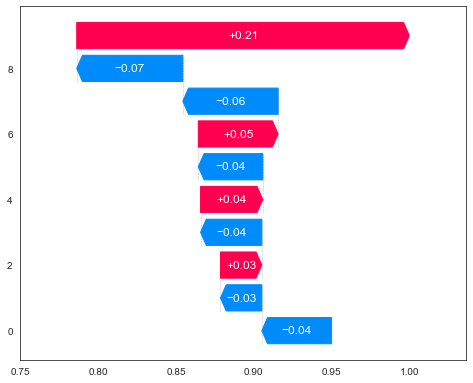

In [55]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [47]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\sponer\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\sponer\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\sponer\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\sponer\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [48]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Sponer Test Organism')]

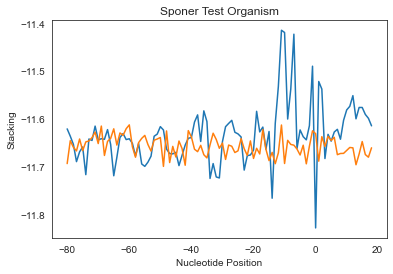

In [49]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Sponer Test Organism')

## Test Labels

In [50]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [51]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [52]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9173160173160173


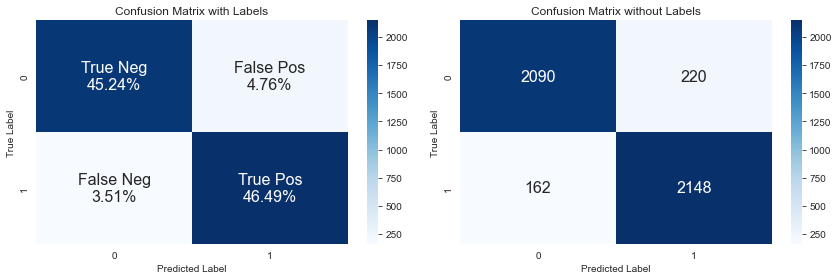

In [53]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [55]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.9199134199134199, Precision: 0.907563025210084, Recall: 0.935064935064935, F1 Score: 0.9211087420042644, MCC: 0.8402127010187249, Specificity: 0.9047619047619048
Fold 2/10
 Accuracy: 0.9264069264069265, Precision: 0.8987854251012146, Recall: 0.961038961038961, F1 Score: 0.9288702928870294, MCC: 0.8548669350823609, Specificity: 0.8917748917748918
Fold 3/10
 Accuracy: 0.8961038961038961, Precision: 0.8860759493670886, Recall: 0.9090909090909091, F1 Score: 0.8974358974358974, MCC: 0.7924751590031897, Specificity: 0.8831168831168831
Fold 4/10
 Accuracy: 0.9177489177489178, Precision: 0.9004149377593361, Recall: 0.9393939393939394, F1 Score: 0.9194915254237289, MCC: 0.8362818106689114, Specificity: 0.8961038961038961
Fold 5/10
 Accuracy: 0.9372294372294372, Precision: 0.9316239316239316, Recall: 0.9437229437229437, F1 Score: 0.9376344086021506, MCC: 0.8745326280013207, Specificity: 0.9307359307359307
Fold 6/10
 Accuracy: 0.9177489177489178, Precision: 0.91774891774891

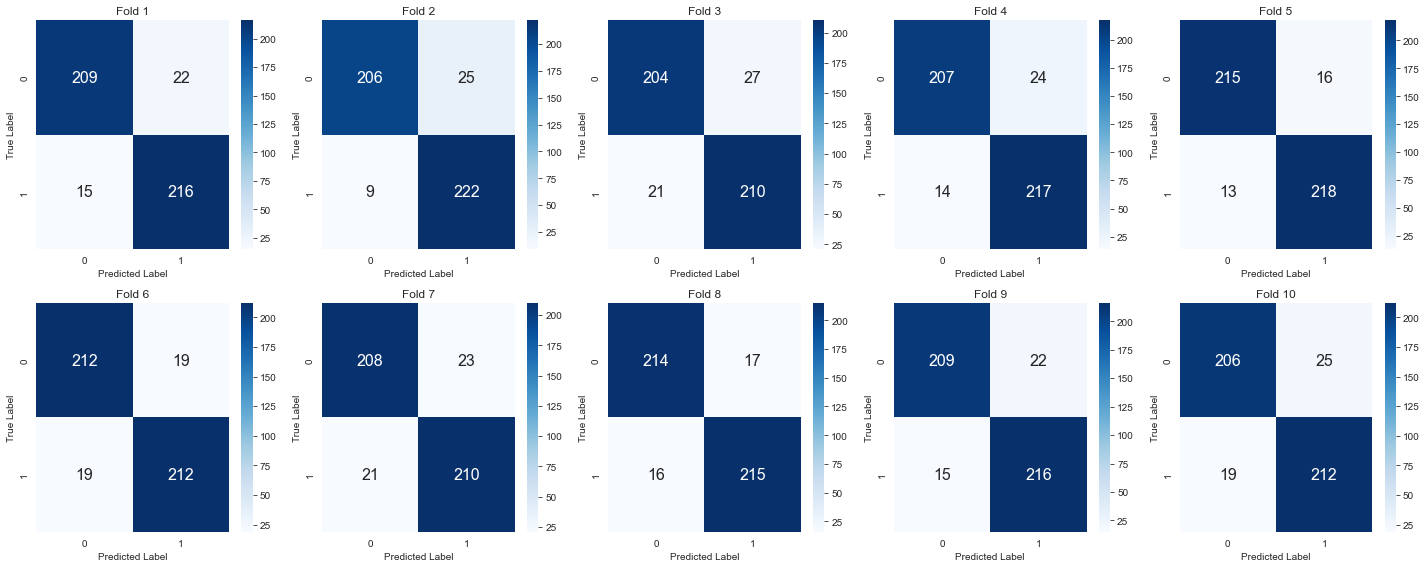

In [56]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [57]:
test_accuracy

[0.9199134199134199,
 0.9264069264069265,
 0.8961038961038961,
 0.9177489177489178,
 0.9372294372294372,
 0.9177489177489178,
 0.9047619047619048,
 0.9285714285714286,
 0.9199134199134199,
 0.9047619047619048]

In [58]:
test_precision

[0.907563025210084,
 0.8987854251012146,
 0.8860759493670886,
 0.9004149377593361,
 0.9316239316239316,
 0.9177489177489178,
 0.9012875536480687,
 0.9267241379310345,
 0.907563025210084,
 0.8945147679324894]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [59]:
test_recall

[0.935064935064935,
 0.961038961038961,
 0.9090909090909091,
 0.9393939393939394,
 0.9437229437229437,
 0.9177489177489178,
 0.9090909090909091,
 0.9307359307359307,
 0.935064935064935,
 0.9177489177489178]

In [60]:
test_specificity

[0.9047619047619048,
 0.8917748917748918,
 0.8831168831168831,
 0.8961038961038961,
 0.9307359307359307,
 0.9177489177489178,
 0.9004329004329005,
 0.9264069264069265,
 0.9047619047619048,
 0.8917748917748918]

In [61]:
test_f1_score

[0.9211087420042644,
 0.9288702928870294,
 0.8974358974358974,
 0.9194915254237289,
 0.9376344086021506,
 0.9177489177489178,
 0.9051724137931034,
 0.9287257019438445,
 0.9211087420042644,
 0.9059829059829059]

In [62]:
test_mcc

[0.8402127010187249,
 0.8548669350823609,
 0.7924751590031897,
 0.8362818106689114,
 0.8745326280013207,
 0.8354978354978355,
 0.8095541526329894,
 0.8571508888036643,
 0.8402127010187249,
 0.8097970204021665]

## Antisense Promoters with Downstream

##### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [63]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense sponer promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.2,-11.5,-9.5,-11.4,-10.6,-12.0,-11.4,-11.5,-12.0,-12.0,...,-9.5,-12.3,-12.0,-12.0,-12.0,-11.5,-11.4,-12.0,-11.5,1
1,-11.4,-12.0,-11.5,-13.2,-13.1,-11.4,-10.6,-11.2,-12.0,-11.5,...,-12.0,-11.5,-13.2,-12.3,-10.6,-11.4,-9.5,-12.3,-12.0,1
2,-12.0,-11.4,-12.3,-10.6,-12.3,-11.4,-10.6,-11.2,-10.6,-11.2,...,-11.5,-13.2,-11.5,-11.4,-13.1,-11.8,-11.2,-12.0,-12.0,1
3,-11.4,-11.5,-11.2,-11.5,-11.4,-12.0,-11.5,-13.2,-11.5,-12.3,...,-12.3,-9.5,-11.4,-11.5,-11.4,-12.0,-12.0,-10.6,-12.3,1
4,-11.5,-9.5,-11.8,-11.2,-12.0,-12.0,-10.6,-11.2,-11.8,-9.5,...,-12.3,-11.5,-9.5,-13.2,-9.5,-9.5,-11.5,-11.4,-11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-13.1,-11.8,-12.0,-12.0,-11.4,-9.5,-9.5,-9.5,-11.5,-12.0,...,-12.0,-11.4,-12.3,-10.6,-11.4,-13.1,-11.8,-11.4,-9.5,0
12164,-12.0,-11.4,-11.5,-12.0,-11.4,-13.1,-9.5,-11.8,-12.3,-13.2,...,-11.8,-9.5,-13.1,-9.5,-11.4,-11.5,-13.2,-13.1,-11.4,0
12165,-11.5,-12.3,-11.4,-10.6,-12.3,-9.5,-9.5,-9.5,-11.4,-11.5,...,-11.8,-11.5,-11.2,-12.0,-11.8,-12.3,-11.5,-13.2,-9.5,0
12166,-12.0,-11.5,-11.4,-10.6,-12.0,-12.3,-13.2,-13.1,-9.5,-9.5,...,-9.5,-9.5,-11.4,-11.8,-11.5,-12.0,-12.0,-11.2,-11.5,0


In [64]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [65]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8069022185702547, Precision: 0.8137583892617449, Recall: 0.7963875205254516, F1 Score: 0.8049792531120333, MCC: 0.613951077124503, Specificity: 0.8917748917748918
Fold 2/10
 Accuracy: 0.819227608874281, Precision: 0.8053375196232339, Recall: 0.8423645320197044, F1 Score: 0.8234349919743178, MCC: 0.6391183358732448, Specificity: 0.8174342105263158
Fold 3/10
 Accuracy: 0.8151191454396056, Precision: 0.8189368770764119, Recall: 0.8095238095238095, F1 Score: 0.8142031379025598, MCC: 0.630283241302144, Specificity: 0.7960526315789473
Fold 4/10
 Accuracy: 0.8216926869350862, Precision: 0.8130990415335463, Recall: 0.8357963875205254, F1 Score: 0.8242914979757084, MCC: 0.6436281854048279, Specificity: 0.8207236842105263
Fold 5/10
 Accuracy: 0.8323746918652424, Precision: 0.8344370860927153, Recall: 0.8289473684210527, F1 Score: 0.8316831683168318, MCC: 0.6647617095185817, Specificity: 0.8075657894736842
Fold 6/10
 Accuracy: 0.8241577649958916, Precision: 0.80401234567901

In [66]:
antisense_accuracy

[0.8069022185702547,
 0.819227608874281,
 0.8151191454396056,
 0.8216926869350862,
 0.8323746918652424,
 0.8241577649958916,
 0.819227608874281,
 0.8274445357436319,
 0.8100328947368421,
 0.8223684210526315]

In [67]:
antisense_precision

[0.8137583892617449,
 0.8053375196232339,
 0.8189368770764119,
 0.8130990415335463,
 0.8344370860927153,
 0.8040123456790124,
 0.813915857605178,
 0.819935691318328,
 0.8105436573311368,
 0.8234323432343235]

In [68]:
antisense_recall

[0.7963875205254516,
 0.8423645320197044,
 0.8095238095238095,
 0.8357963875205254,
 0.8289473684210527,
 0.8569078947368421,
 0.8273026315789473,
 0.8388157894736842,
 0.8092105263157895,
 0.8207236842105263]

In [69]:
antisense_specificity

[0.8917748917748918,
 0.8174342105263158,
 0.7960526315789473,
 0.8207236842105263,
 0.8075657894736842,
 0.8357963875205254,
 0.7914614121510674,
 0.8111658456486043,
 0.8160919540229885,
 0.8108552631578947]

In [70]:
antisense_f1_score

[0.8049792531120333,
 0.8234349919743178,
 0.8142031379025598,
 0.8242914979757084,
 0.8316831683168318,
 0.8296178343949046,
 0.8205546492659054,
 0.8292682926829268,
 0.8098765432098766,
 0.8220757825370677]

In [71]:
antisense_mcc

[0.613951077124503,
 0.6391183358732448,
 0.630283241302144,
 0.6436281854048279,
 0.6647617095185817,
 0.6497394664194055,
 0.6385460859048675,
 0.6550687564380379,
 0.620066628163748,
 0.6447403303652749]

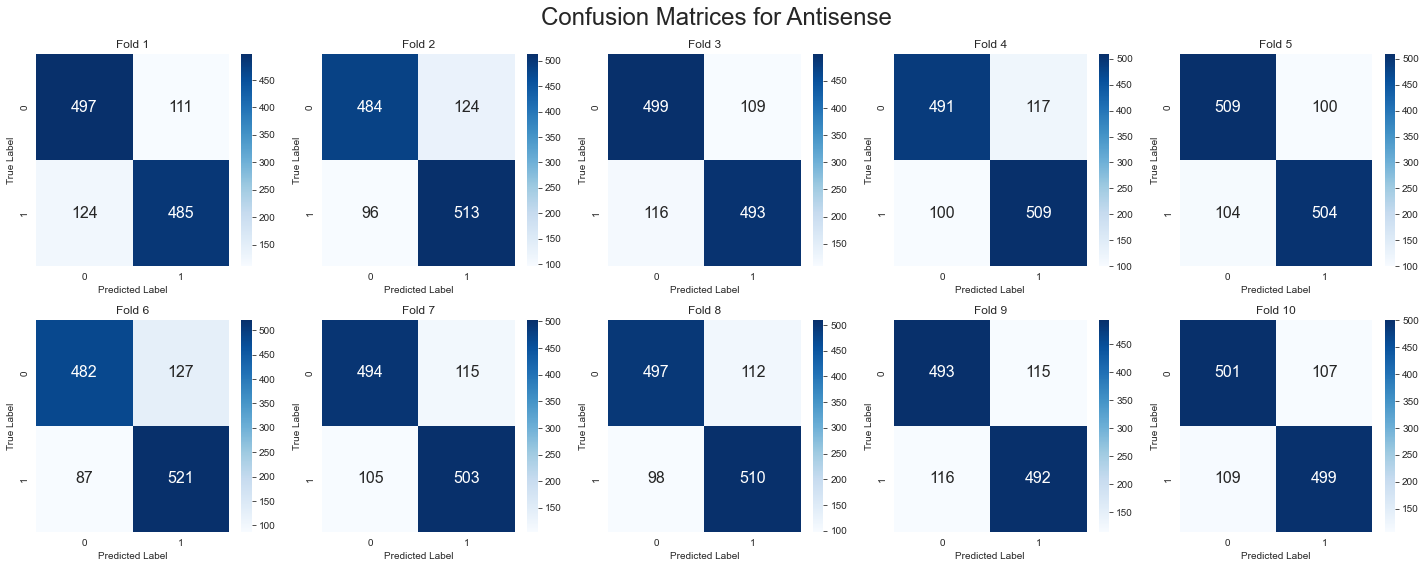

In [72]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

In [73]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced sponer promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.5,-11.4,-13.1,-11.8,-11.2,-11.8,-13.1,-9.5,-9.5,-11.4,...,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-10.6,-11.4,-12.3,1
1,-10.6,-11.4,-12.3,-12.0,-12.0,-10.6,-12.0,-12.0,-11.2,-11.8,...,-12.3,-11.5,-13.2,-11.5,-12.0,-11.2,-10.6,-12.3,-13.2,1
2,-9.5,-9.5,-13.2,-9.5,-12.3,-10.6,-12.3,-13.2,-12.3,-11.5,...,-11.5,-13.2,-12.3,-12.0,-10.6,-12.0,-12.3,-13.2,-11.5,1
3,-11.8,-12.3,-12.0,-11.8,-11.5,-12.3,-11.4,-10.6,-12.0,-11.2,...,-12.0,-12.0,-11.8,-13.1,-11.4,-12.0,-12.0,-10.6,-11.4,1
4,-11.5,-11.4,-11.5,-12.0,-12.0,-11.2,-12.0,-12.0,-10.6,-11.4,...,-11.8,-12.3,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-10.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-9.5,-13.2,-9.5,-9.5,-12.3,-11.8,-13.1,-9.5,-13.2,-13.1,...,-12.3,-12.0,-11.8,-11.5,-11.4,-9.5,-9.5,-13.1,-9.5,0
12126,-9.5,-13.1,-11.4,-11.8,-13.1,-13.2,-12.3,-12.0,-11.5,-13.2,...,-9.5,-13.2,-13.1,-11.4,-12.0,-11.8,-9.5,-13.1,-13.2,0
12127,-12.0,-11.5,-11.4,-12.0,-11.5,-11.4,-11.8,-9.5,-13.1,-11.4,...,-12.3,-11.8,-13.1,-13.2,-9.5,-12.3,-11.8,-9.5,-12.3,0
12128,-13.2,-9.5,-13.1,-11.4,-12.0,-11.5,-11.4,-11.8,-9.5,-12.3,...,-13.2,-13.1,-9.5,-11.4,-10.6,-11.4,-13.1,-9.5,-13.2,0


In [74]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [75]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8235779060181369, Precision: 0.8370497427101201, Recall: 0.8039538714991763, F1 Score: 0.8201680672268908, MCC: 0.647674341787472, Specificity: 0.8240131578947368
Fold 2/10
 Accuracy: 0.8046166529266282, Precision: 0.8125, Recall: 0.7924217462932455, F1 Score: 0.8023352793994996, MCC: 0.6094274145259245, Specificity: 0.8432343234323433
Fold 3/10
 Accuracy: 0.8062654575432812, Precision: 0.8174061433447098, Recall: 0.7891268533772653, F1 Score: 0.8030176026823135, MCC: 0.6129092047519019, Specificity: 0.8168316831683168
Fold 4/10
 Accuracy: 0.809563066776587, Precision: 0.8252595155709342, Recall: 0.785831960461285, F1 Score: 0.8050632911392405, MCC: 0.619849821563235, Specificity: 0.8234323432343235
Fold 5/10
 Accuracy: 0.8004946413849959, Precision: 0.8151986183074266, Recall: 0.7775947281713345, F1 Score: 0.7959527824620573, MCC: 0.6016456495640489, Specificity: 0.8333333333333334
Fold 6/10
 Accuracy: 0.8276999175597691, Precision: 0.838160136286201, Recall: 0.

In [76]:
internal_accuracy

[0.8235779060181369,
 0.8046166529266282,
 0.8062654575432812,
 0.809563066776587,
 0.8004946413849959,
 0.8276999175597691,
 0.8301731244847486,
 0.8054410552349547,
 0.8260511129431163,
 0.8466611706512778]

In [77]:
internal_precision

[0.8370497427101201,
 0.8125,
 0.8174061433447098,
 0.8252595155709342,
 0.8151986183074266,
 0.838160136286201,
 0.8378378378378378,
 0.8211805555555556,
 0.8471001757469244,
 0.8671328671328671]

In [78]:
internal_recall

[0.8039538714991763,
 0.7924217462932455,
 0.7891268533772653,
 0.785831960461285,
 0.7775947281713345,
 0.8118811881188119,
 0.8184818481848185,
 0.7805280528052805,
 0.7953795379537953,
 0.8184818481848185]

In [79]:
internal_specificity

[0.8240131578947368,
 0.8432343234323433,
 0.8168316831683168,
 0.8234323432343235,
 0.8333333333333334,
 0.8234323432343235,
 0.8434925864909391,
 0.841845140032949,
 0.8303130148270181,
 0.85667215815486]

In [80]:
internal_f1_score

[0.8201680672268908,
 0.8023352793994996,
 0.8030176026823135,
 0.8050632911392405,
 0.7959527824620573,
 0.8248113998323555,
 0.8280467445742905,
 0.8003384094754652,
 0.8204255319148936,
 0.8421052631578946]

In [81]:
internal_mcc

[0.647674341787472,
 0.6094274145259245,
 0.6129092047519019,
 0.619849821563235,
 0.6016456495640489,
 0.6557125547866817,
 0.6605155584054588,
 0.6116147172723851,
 0.653301446339892,
 0.6944000487410261]

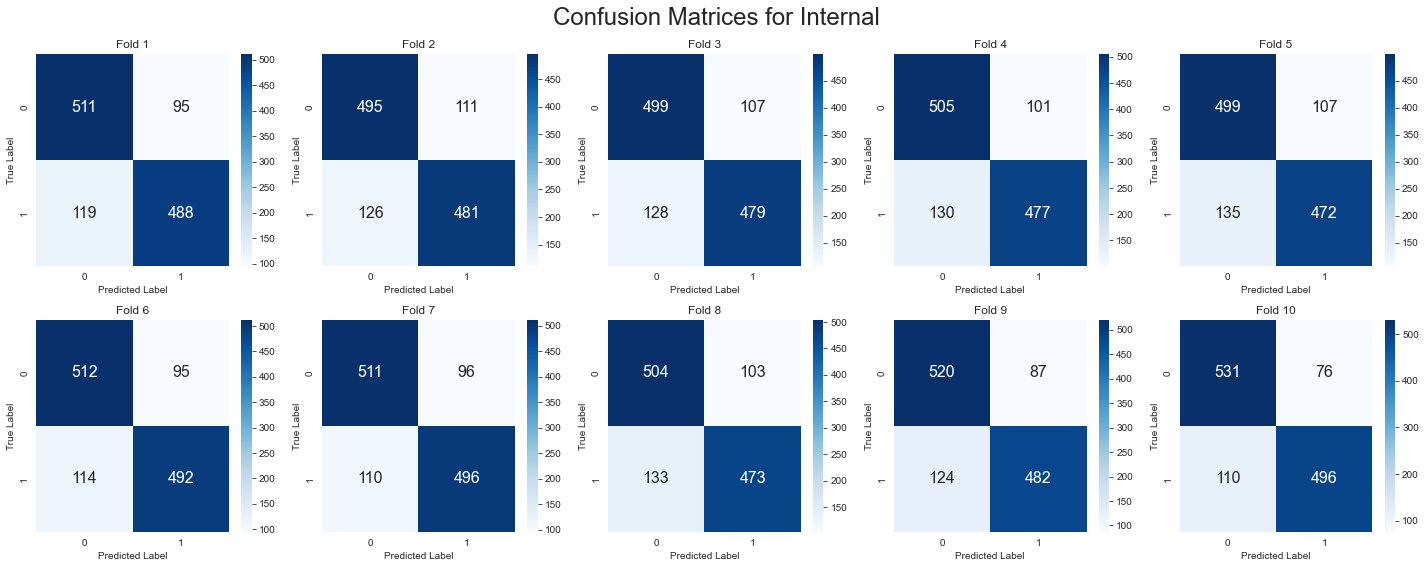

In [82]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
